# Agricultural Production in India

In [49]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
data = pd.read_csv(r'C:\Users\knataraj\Desktop\ML\apy.csv')

In [51]:
len(data)

246091

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       246091 non-null object
District_Name    246091 non-null object
Crop_Year        246091 non-null int64
Season           246091 non-null object
Crop             246091 non-null object
Area             246091 non-null float64
Production       246091 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [53]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [54]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88


In [55]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

There are no missing values in the dataset

### Rice production in states 

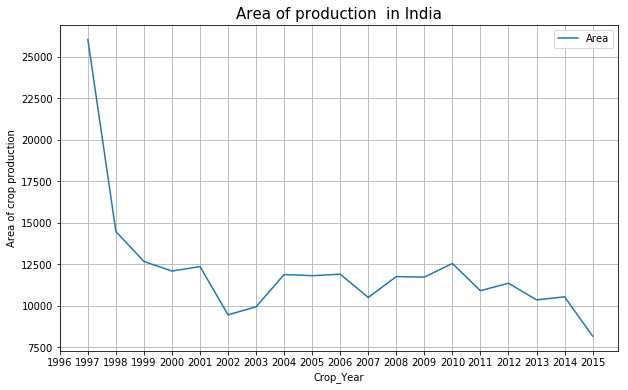

In [56]:
average_rain_by_year = data.groupby('Crop_Year').mean()['Area'].plot(figsize=(10,6))
plt.xticks(range(1996,2016))
plt.ylabel('Area of crop production')
plt.title('Area of production  in India', fontsize=15)
plt.legend()
plt.grid()

In [57]:
avera_area_per_year = data.groupby('Crop_Year').mean()['Area']
avera_area_per_year

Crop_Year
1997    26038.324081
1998    14479.153906
1999    12678.074790
2000    12102.612169
2001    12371.499489
2002     9463.680476
2003     9954.769395
2004    11891.933465
2005    11822.333236
2006    11913.672644
2007    10513.848637
2008    11768.527148
2009    11738.077997
2010    12557.355280
2011    10918.140920
2012    11369.858240
2013    10368.125223
2014    10549.306622
2015     8187.362989
Name: Area, dtype: float64

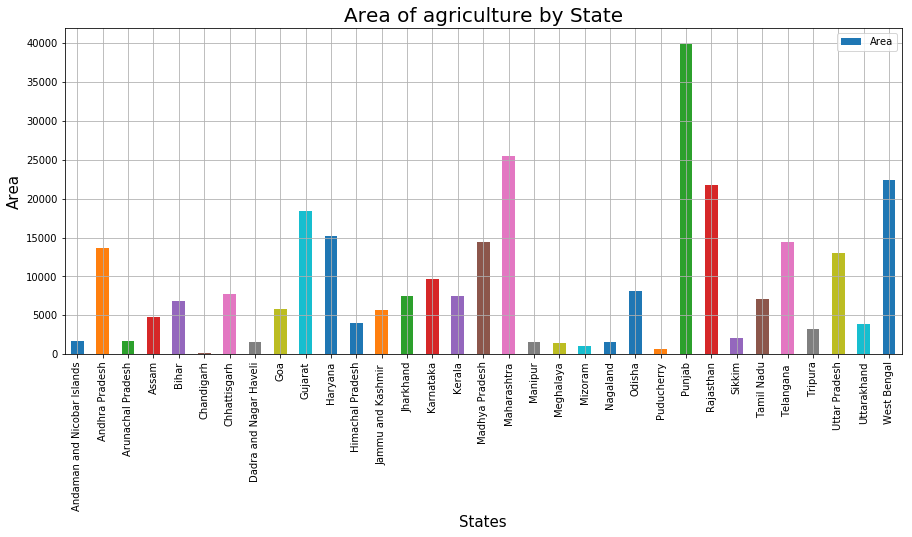

In [58]:
data.groupby('State_Name').mean()['Area'].plot.bar(figsize=(15,6))
plt.title('Area of agriculture by State', fontsize = 20)
plt.xlabel('States', fontsize=15)
plt.ylabel('Area', fontsize=15)
plt.legend()
plt.grid()

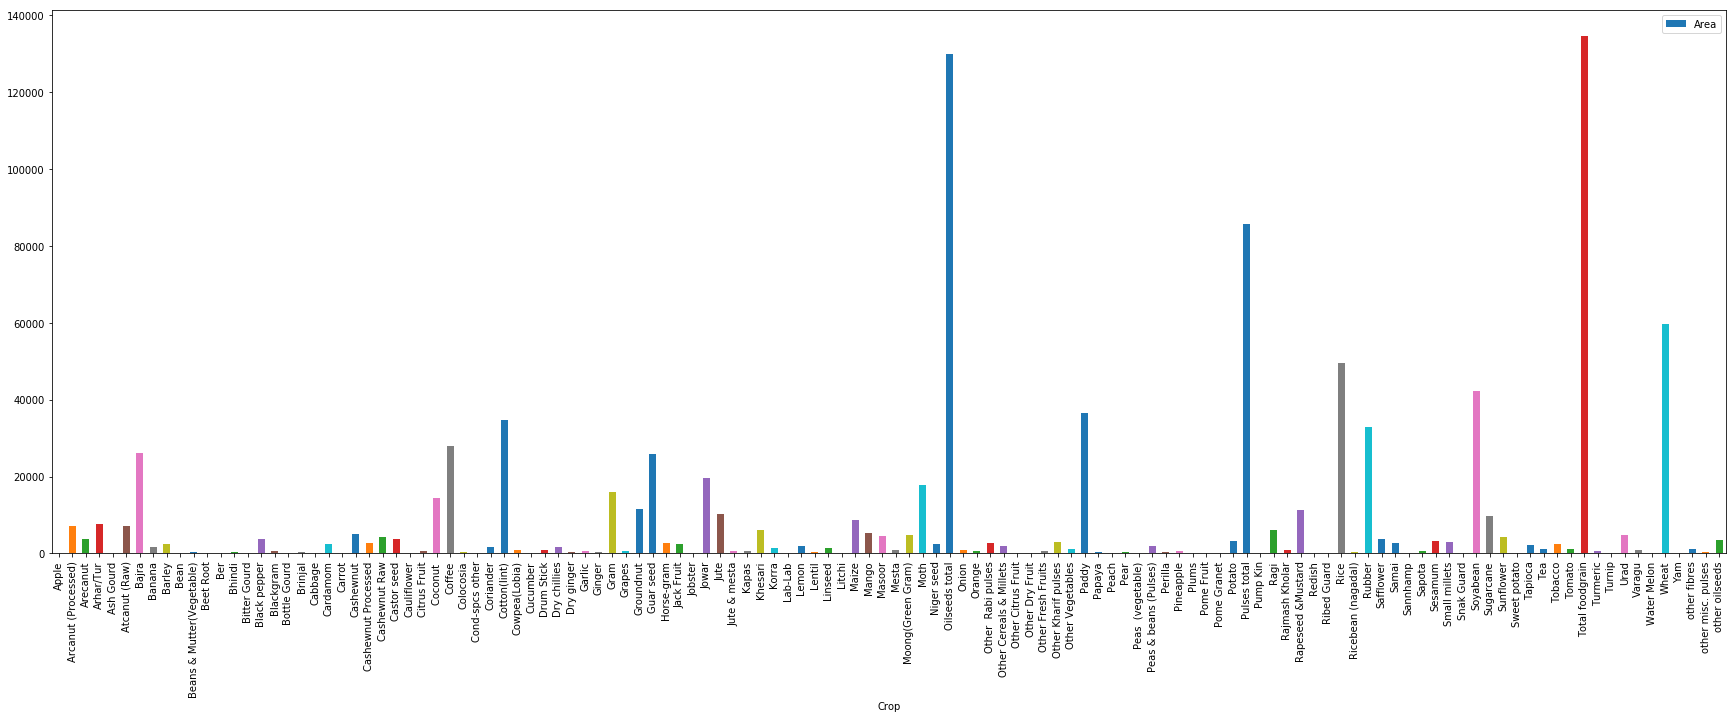

In [59]:
data.groupby('Crop').mean()['Area'].plot.bar(figsize=(30,10))
plt.legend(loc='best')

## Column 'Production' is in string format, we need to convert the numbers which are represented as string objects back to numbers

In [60]:
data['Production'] = pd.to_numeric(data['Production'], errors='coerce')

In [61]:
type(data['Production'])

pandas.core.series.Series

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       246091 non-null object
District_Name    246091 non-null object
Crop_Year        246091 non-null int64
Season           246091 non-null object
Crop             246091 non-null object
Area             246091 non-null float64
Production       242364 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Production is now converted to float object

###  Production w.r.t years

Text(0.5, 1.0, 'Production vs Year')

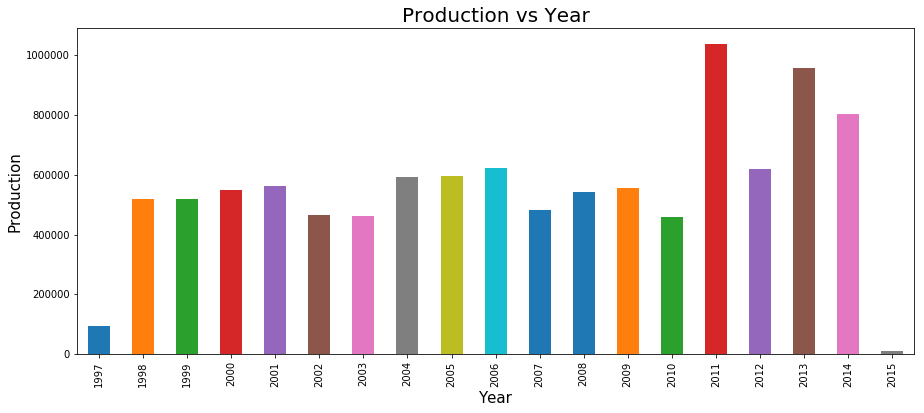

In [63]:
data.groupby('Crop_Year').mean()['Production'].plot.bar(figsize=(15,6))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Production', fontsize = 15)
plt.title('Production vs Year', fontsize = 20)

In [64]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [65]:
data['Production'].mean()

582496.2319791336

###  Production w.r.t years

Text(0.5, 1.0, 'Production vs Season')

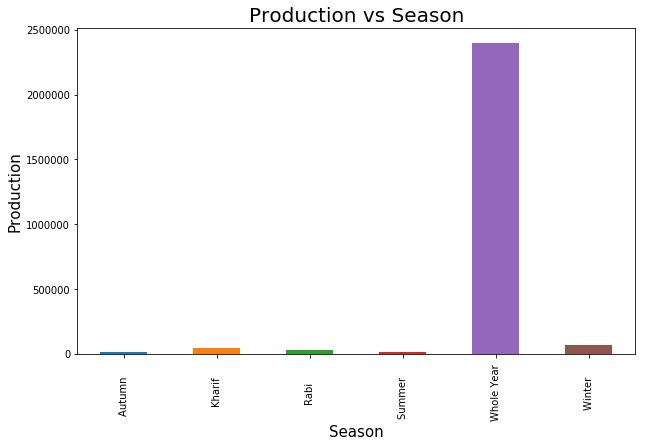

In [66]:
data.groupby('Season').mean()['Production'].plot(kind='bar', figsize= (10,6))
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Production', fontsize = 15)
plt.title('Production vs Season', fontsize = 20)

### Some of the data in Production column is NaN object which won't get converted to float

In [67]:
data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3727
dtype: int64

In [68]:
data['Production'] = data['Production'].fillna(data['Production'].mean())

### Replacing NaN objects with mean of the column

In [69]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## Graphs after the production data is converted to float

Text(0.5, 1.0, 'Production vs Year')

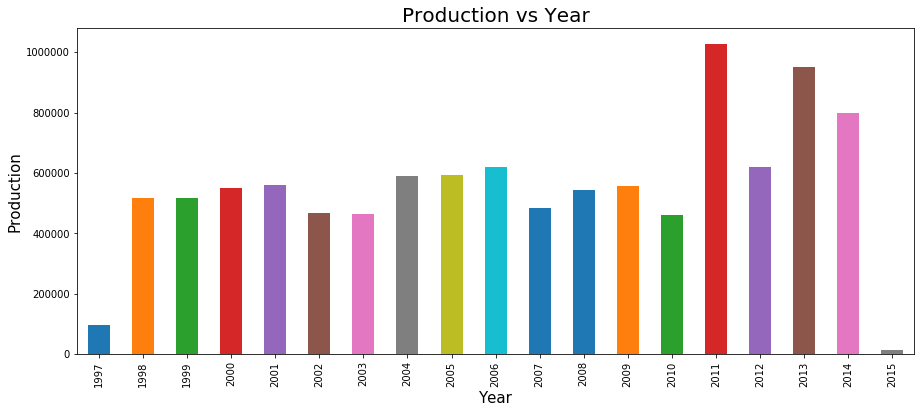

In [70]:
data.groupby('Crop_Year').mean()['Production'].plot.bar(figsize=(15,6))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Production', fontsize = 15)
plt.title('Production vs Year', fontsize = 20)

Text(0.5, 1.0, 'Production vs Season')

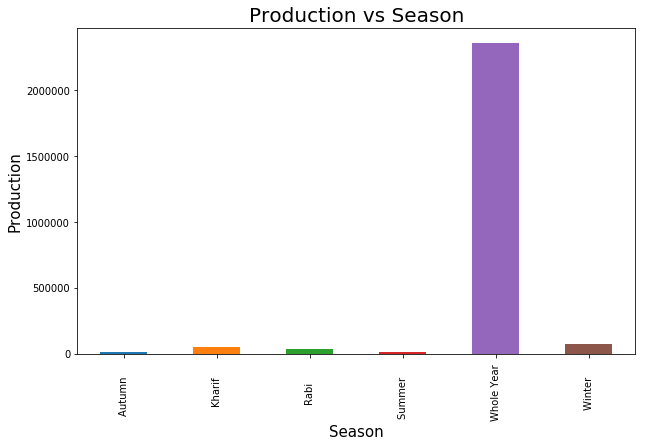

In [71]:
data.groupby('Season').mean()['Production'].plot(kind='bar', figsize= (10,6))
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Production', fontsize = 15)
plt.title('Production vs Season', fontsize = 20)